![Logo TUBAF](https://tu-freiberg.de/sites/default/files/media/freiberger-alumni-netzwerk-6127/wbm_orig_rgb_0.jpg)

Exercise material of the MSc-level course **Advanced Soil Mechanics**.
Held at Technische Universität Bergakademie Freiberg.

Comments to:

*Prof. Dr. Thomas Nagel  
Chair of Soil Mechanics and Foundation Engineering  
Geotechnical Institute  
Technische Universität Bergakademie Freiberg.*

https://tu-freiberg.de/en/fakultaet3/gt/soilmechanics


# Sohldruckverteilungen

## Halbraumspannungen unter schlaffen und starren Rechtecklasten

In [1]:
#HIDDEN
import numpy as np #numerical methods
import matplotlib.pyplot as plt #plotting
import seaborn as sns
import sympy as sp
sp.init_printing(use_latex='mathjax') #makes sympy output look nice
import scipy as scp

#Some plot settings
import plot_functions.plot_settings
%run plot_functions/stresses_steinbrenner_plots.ipynb

## Wiederholung: Vom schlaffen Lastbündel zur starren Sohlplatte

Für die auf eine rechteckige Fläche aufgebrachte Last schließlich finden wir folgende Sohldruckverteilung im Falle der starren Platte im Vergleich zum schlaffen Lastbündel der Intensität $q$:

$$
    \frac{\sigma_0(x,y)}{q} = \frac{4}{\pi^2 \sqrt{\left[1 - 4\left( \frac{x}{a} \right)^2\right]\left[1 - 4\left( \frac{y}{b} \right)^2\right]}}
$$

Der kennzeichnende Punkt wird auf der Diagonalen der Rechteckfläche liegen. Diese Diagonale ist im auf ein Einheitsquadrat skalierten und um den Koordinatenursprung zentrierten Rechteck gekennzeichnet durch die Radialkoordinate:

$$
    \bar{r} = \frac{x}{a} = \frac{y}{b}
$$

Damit ergibt sich die Lage der vier kennzeichnenden Punkte über die Beziehung

$$
    \bar{r}_\text{K} = \pm \frac{1}{2} \sqrt{1 - \frac{4}{\pi^2}} \approx 0.386
$$


Somit gilt

\begin{align}
    x_\text{K} &\approx \pm 0.386 a
    \\
    y_\text{K} &\approx \pm 0.386 b
\end{align}

Im folgenden Bild ist die Sohldruckverteilung unter dem starren Rechteckfundament dargestellt. Die graue Ebene stellt hingegen die gleichförmig verteilte Last $q$ dar. Die roten Punkte kennzeichnen die charakteristischen Punkte.

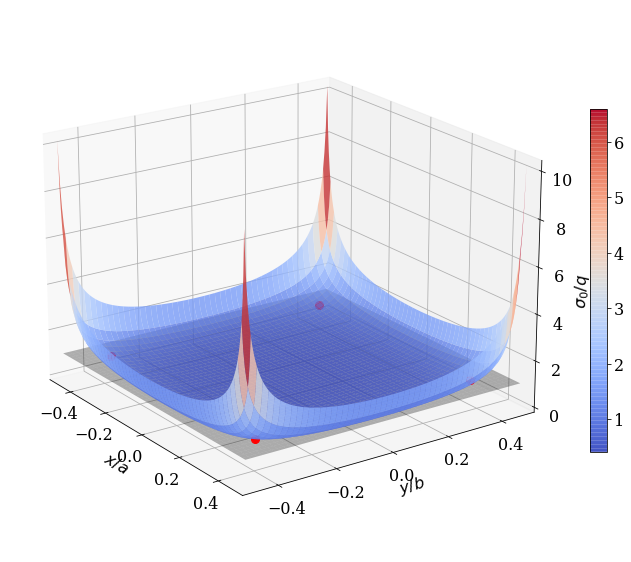

In [2]:
#HIDDEN
#%run plot_functions/stresses_steinbrenner_plots.ipynb
plot_char_pt_rect()

## Geradlinige Verteilungen des Sohldrucks

Die Sohldruckberechnung ist eine schwierige Aufgabe, da Wechselwirkungen aufgrund der Verformungen von Baugrund und Bauwerk berücksichtigt werden müssen. Für bestimmte Nachweise sind vereinfachte statische Ansätze zulässig. Bei den Grenzzuständen der Gebrauchstauglichkeit beispielsweise (Fundamentverdrehung, Begrenzung klaffender Fugen, Setzungsnachweise) sind geradlinige Verteilungen zulässig, die sich aus den Gleichgewichtsbedingungen ableiten lassen.

Wir betrachten dies nun zunächst für rechteckförmige Fundamentkörper der Abmessungen $a \times b$ in der $x-y$ Ebene (Koordinatenursprung im Schwerpunkt des Fundamentes), die durch eine Vertikallast $V$ am Angriffspunkt mit den Exzentrizitäten $(e_x,e_y)$ belastet seien.

Damit ist das Fundament begrenzt durch die Eckpunkte $(x_i,y_i)$ mit

\begin{align}
    x_i &= \{-a/2,\ -a/2,\ a/2,\ a/2\} \quad \text{für } i \in [0,3]
    \\
    y_i &= \{-b/2,\ b/2,\ b/2,\ -b/2\} \quad \text{für } i \in [0,3]
\end{align}

An diesen Eckpunkten stellen sich die vier Sohlspannungen $\sigma_{0,i}$ ein, die die greadlinige (bilineare) Sohldruckverteilung bestimmen. Da drei Punkte eine Ebene definieren, ist der vierte Punkt nicht unabhängig wählbar.

Diese Spannungswerte bestimmen eine Ebene im Raum

$$
    \sigma_0(x,y) = c_0 + c_1 x + c_2 y
$$

Die Koeffizienten können aus den Eckpunktkoordinaten und den dort gegebenen Spannungswerten mittels eines linearen Gleichungssystems bestimmt werden. Die Gleichung für den 4. Punkt wäre nicht linear unabhängig -- es genügt ein $3\times 3$ System.

$$
    \begin{pmatrix}
    1 & -a/2 & -b/2 \\
    1 & -a/2 & b/2\\
    1 & a/2 & b/2
    \end{pmatrix}
    \begin{pmatrix}
        c_0 \\
        c_1 \\
        c_2
    \end{pmatrix}
    = 
    \begin{pmatrix}
        \sigma_{0,0} \\
        \sigma_{0,1} \\
        \sigma_{0,2}
    \end{pmatrix}
$$

Wir nutzen Sie hier allerdings gleich, um die Spannung am 4. Eckpunkt zu berechnen.
 
$$
    \begin{pmatrix}
    1 & -a/2 & -b/2 & 0\\
    1 & -a/2 & b/2 & 0\\
    1 & a/2 & b/2 & 0\\
    1 & a/2 & -b/2 & -1
    \end{pmatrix}
    \begin{pmatrix}
        c_0 \\
        c_1 \\
        c_2 \\
        \sigma_{0,3}
    \end{pmatrix}
    = 
    \begin{pmatrix}
        \sigma_{0,0} \\
        \sigma_{0,1} \\
        \sigma_{0,2} \\
        0
    \end{pmatrix}
$$

In [3]:
#HIDDEN
a, b, s0, s1, s2, s3 = sp.symbols('a b \sigma_0 \sigma_1 \sigma_2 \sigma_3')

In [4]:
s_vec = sp.Matrix([s0,s1,s2,0])
A = sp.Matrix([[1, -a/2, -b/2, 0],
              [1, -a/2, b/2, 0],
              [1, a/2, b/2, 0],
              [1, a/2, -b/2, -1]])

In [5]:
c_vec = A.LUsolve(s_vec)

In [6]:
sp.factor(c_vec)

⎡     \sigma₀   \sigma₂     ⎤
⎢     ─────── + ───────     ⎥
⎢        2         2        ⎥
⎢                           ⎥
⎢    -\sigma₁ + \sigma₂     ⎥
⎢    ──────────────────     ⎥
⎢            a              ⎥
⎢                           ⎥
⎢    -\sigma₀ + \sigma₁     ⎥
⎢    ──────────────────     ⎥
⎢            b              ⎥
⎢                           ⎥
⎣\sigma₀ - \sigma₁ + \sigma₂⎦

Wir sehen, dass der erste Wert der "diagonale" Mittelwert dem Verteilung entspricht:

$$
    c_0 = \frac{\sigma_{0,0} + \sigma_{0,2}}{2}
$$

Der zweite Wert ist der mittlere Anstieg in $x$-Richtung:

$$
    c_1 = \frac{\sigma_{0,2} - \sigma_{0,1}}{a}
$$

Der dritte Wert entspricht dem mittleren Anstieg in $y$-Richtung:

$$
    c_2 = \frac{\sigma_{0,1} - \sigma_{0,0}}{b}
$$

Der Spannung am 4. Eckpunkt ergibt sich ausgehend vom Mittelwert durch die bereits bekannten Anstiege zu

$$
    \sigma_{0,3} = \sigma_{0,0} - \sigma_{0,1} + \sigma_{0,2}
$$

Damit lässt sich die Verteilung der Spannungen wie folgt schreiben:

$$
    \sigma_0(\xi,\eta) = \frac{\sigma_{0,0} + \sigma_{0,2}}{2} + \left( \sigma_{0,2} - \sigma_{0,1} \right) \xi + \left( \sigma_{0,1} - \sigma_{0,0} \right) \eta \quad \text{mit} \quad \xi = \frac{x}{a} \in [-0.5,0.5],\ \eta = \frac{y}{b} \in [-0.5,0.5]
$$

In [7]:
#HIDDEN
#%run plot_functions/stresses_steinbrenner_plots.ipynb
interactive_sohlfuge_lin()

interactive(children=(IntSlider(value=100, description='$\\sigma_{0,0}$ / kPa', max=150, min=50), IntSlider(va…

Diese Verteilung muss nun im statischen Gleichgewicht mit der Belastung $V$ sein. Konkret bedeutet das, dass die Resultierende dieser Flächenlast betragsmäßig gleich aber entgegengesetzt gerichtet zu $V$ sein muss, also $\vec{R} = -\vec{V}$ und denselben Angriffspunkt in der $x-y$ Ebene haben muss. Der Betrag $|\vec{R}|$ ergibt sich aus dem Mittelwert der Flächenlast, die Exzentrizitäten aus der Ermittlung des Schwerpunktes, jeweils unter Berücksichtigung der Wirkfläche.

$$
    R = \int \limits_{-\frac{b}{2}}^{\frac{b}{2}} \int \limits_{-\frac{a}{2}}^{\frac{a}{2}} \sigma_0(x,y)\, \text{d}x\,\text{d}y = \int \limits_{-\frac{1}{2}}^{\frac{1}{2}} \int \limits_{-\frac{1}{2}}^{\frac{1}{2}} \sigma_0(\xi,\eta)\, a\text{d}\xi\, b\text{d}\eta
$$

In [8]:
#HIDDEN
xi, eta = sp.symbols('xi eta')

In [9]:
sig = (s0+s2)/2 + (s2-s1)*xi + (s1-s0)*eta

In [10]:
R = sp.integrate(sp.integrate(sig*a*b,(xi,-0.5,0.5)),(eta,-0.5,0.5))
sp.factor(R)

0.5⋅a⋅b⋅(\sigma₀ + \sigma₂)

Wir finden also wieder unsere mittlere Spannung

Die Schwerpunktlage ergibt sich durch Äquivalenz der Drehmomente der Flächenlast und der Resultierenden um die Achsen $x$ bzw. $y$, z.B.

$$
    R e_x = \int \limits_{-\frac{1}{2}}^{\frac{1}{2}} \int \limits_{-\frac{1}{2}}^{\frac{1}{2}} \sigma_0(\xi,\eta)\,a\xi \, a\text{d}\xi\,b\text{d}\eta
$$

so dass

\begin{align}
    e_x &= \frac{1}{R} \int \limits_{-\frac{1}{2}}^{\frac{1}{2}} \int \limits_{-\frac{1}{2}}^{\frac{1}{2}} \sigma_0(\xi,\eta)\,a\xi \, a\text{d}\xi\,b\text{d}\eta
    \\
    e_y &= \frac{1}{R} \int \limits_{-\frac{1}{2}}^{\frac{1}{2}} \int \limits_{-\frac{1}{2}}^{\frac{1}{2}} \sigma_0(\xi,\eta)\,b\eta \, a\text{d}\xi\,b\text{d}\eta
\end{align}

In [11]:
e_x = sp.integrate(sp.integrate(sig*xi*a*a*b,(xi,-1/2,1/2)),(eta,-1/2,1/2))/R
sp.factor(e_x)

-0.166666666666667⋅a⋅(1.0⋅\sigma₁ - 1.0⋅\sigma₂) 
─────────────────────────────────────────────────
                \sigma₀ + \sigma₂                

In [12]:
e_y = sp.integrate(sp.integrate(sig*eta*b*a*b,(xi,-0.5,0.5)),(eta,-0.5,0.5))/R
sp.factor(e_y)

-0.166666666666667⋅b⋅(1.0⋅\sigma₀ - 1.0⋅\sigma₁) 
─────────────────────────────────────────────────
                \sigma₀ + \sigma₂                

Somit ergeben sich die Exzentrizitäten

$$
    e_x = \frac{(\sigma_{0,2} - \sigma_{0,1})ab}{2R} \frac{a}{6} \quad \text{und} \quad e_y = \frac{(\sigma_{0,1} - \sigma_{0,0})ab}{2R} \frac{b}{6} \quad \text{mit} \quad 2 R = (\sigma_{0,0} + \sigma_{0,2})ab
$$

Durch Umstellen der Gleichung können wir nun den üblichen Fall betrachten: Wir kennen $V$, $e_x$ sowie $e_y$ und suchen die zugehörige Spannungsverteilung. Dazu sammeln wir hier nochmals die gegebenen Gleichungen:

\begin{align}
    2V &= ab (\sigma_{0,0} + \sigma_{0,2})\\
    12 V \frac{e_x}{a} &= (\sigma_{0,2} - \sigma_{0,1})ab\\
    12 V \frac{e_y}{b} &= (\sigma_{0,1} - \sigma_{0,0})ab
\end{align}

Aus diesen drei in den Eckspannungen linearen Gleichungen lässt sich die Spannungsverteilung bestimmen:

$$
    \begin{pmatrix}
    1 & 0 & 1 \\
    0 & -1 & 1\\
    -1 & 1 & 0\\
    \end{pmatrix}
    \begin{pmatrix}
        \sigma_{0,0} \\
        \sigma_{0,1} \\
        \sigma_{0,2}
    \end{pmatrix}
    =
    \frac{2V}{ab}
    \begin{pmatrix}
        1 \\
        6 \frac{e_x}{a} \\
        6 \frac{e_y}{b}
    \end{pmatrix}
$$

In [13]:
#HIDDEN
V, ex, ey = sp.symbols('V e_x e_y')

In [14]:
RHS = 2*V/(a*b) * sp.Matrix([1, 6*ex/a, 6*ey/b])
A = sp.Matrix([[1,0,1],
              [0,-1,1],
              [-1,1,0]])

In [15]:
s_vec = A.LUsolve(RHS)
sp.factor(s_vec)

⎡ V    6⋅V⋅e_y   6⋅V⋅eₓ⎤
⎢─── - ─────── - ──────⎥
⎢a⋅b        2      2   ⎥
⎢        a⋅b      a ⋅b ⎥
⎢                      ⎥
⎢ V    6⋅V⋅e_y   6⋅V⋅eₓ⎥
⎢─── + ─────── - ──────⎥
⎢a⋅b        2      2   ⎥
⎢        a⋅b      a ⋅b ⎥
⎢                      ⎥
⎢ V    6⋅V⋅e_y   6⋅V⋅eₓ⎥
⎢─── + ─────── + ──────⎥
⎢a⋅b        2      2   ⎥
⎣        a⋅b      a ⋅b ⎦

In [16]:
#\sigma_{0,3}
s_vec[0] - s_vec[1] + s_vec[2]

 V    6⋅V⋅e_y   6⋅V⋅eₓ
─── - ─────── + ──────
a⋅b        2      2   
        a⋅b      a ⋅b 

Somit ergeben sich die Spannungen aus dem Mittelwert und einer Permutation der exzentrischen Anteile:

\begin{align}
    \begin{pmatrix}
        \sigma_{0,0} \\
        \sigma_{0,1} \\
        \sigma_{0,2} \\
        \sigma_{0,3}
    \end{pmatrix}
    =
    \frac{V}{ab}
    \begin{pmatrix}
        1 - 6\frac{e_x}{a} - 6 \frac{e_y}{b} \\
        1 - 6\frac{e_x}{a} + 6 \frac{e_y}{b} \\
        1 + 6\frac{e_x}{a} + 6 \frac{e_y}{b} \\
        1 + 6\frac{e_x}{a} - 6 \frac{e_y}{b}
    \end{pmatrix}
\end{align}

In der folgenden Darstellung wird die auf die Fundamentplatte wirkende Kraft durch die schwarze Linie repräsentiert. Die Variation ihres Betrags und Angriffspunktes führt zur entsprechenden Variation der Spannungsverteilung.

In [17]:
#HIDDEN
#%run plot_functions/stresses_steinbrenner_plots.ipynb
interactive_sohlfuge_lin()

interactive(children=(IntSlider(value=100, description='$\\sigma_{0,0}$ / kPa', max=150, min=50), IntSlider(va…

Die einzelnen Spannungen lassen sich durch die Gleichung

$$
    \sigma_{0,i} = \frac{V}{ab} \left( 1 \pm 6 \frac{|e_x|}{a} \pm 6 \frac{|e_y|}{b} \right)
$$

und entsprechende Variation der Vorzeichen zusammenfassen. Zugspannungen treten also auf, wenn der Klammerausdruck negativ wird. Um überall in der Sohlfuge Druckspannungen sicherzustellen muss also gelten:

$$
    1 \pm 6 \frac{|e_x|}{a} \pm 6 \frac{|e_y|}{b} \geq 0
$$

Die dadurch ausgewiesene sogenannte 1. Kernweite wird durch folgende vier Geraden begrenzt:

$$
    \pm \frac{|e_x|}{a} \pm \frac{|e_y|}{b} = \frac{1}{6}
$$

In [18]:
#HIDDEN
interactive_sohlfuge_lin_V(True)

interactive(children=(IntSlider(value=100, description='$V$ / $ab$', max=200, step=5), FloatSlider(value=0.0, …

Da Zugspannungen in der Fundamentsohle nicht übertragen werden können, ist die lineare Spannungsverteilung bei Kraftangriffspunkten außerhalb der ersten Kernweite nicht mehr gültig! Was passiert dann? Wir schauen uns der Einfachheit halber den Fall mit variablem $e_x$ aber $e_y \equiv 0$ an und fassen die bisherige Lösung zusammen:

\begin{align}
    \sigma_0(x=-\frac{a}{2}) &= \frac{V}{ab} \left( 1 - 6 \frac{e_x}{a} \right) \text{  und  } \sigma_0(x=\frac{a}{2}) = \frac{V}{ab} \left( 1 + 6 \frac{e_x}{a}  \right) \quad \text{für} \quad e_x \in [0, a/6]
    \\
    \sigma_0(x=-\frac{a}{2}) &= \frac{V}{ab} \left( 1 + 6 \frac{e_x}{a} \right) \text{  und  } \sigma_0(x=\frac{a}{2}) = \frac{V}{ab} \left( 1 - 6 \frac{e_x}{a}  \right) \quad \text{für} \quad e_x \in [-a/6,0]
\end{align}

Es kommt bei Überschreiten der Grenzen zu einer Spannungsumlagerung vom unbelasteten Bereich (die rechnerischen Zugspannungen werden zu Null gesetzt) in den noch belasteten Bereich. Dadurch kommt es zu einer sog. klaffenden Fuge. Gleichzeitig erhöht sich die kraftseitige Eckspannung. Wir führen als Unbekannte diese Eckspannung und die Koordinate der Nulllinie $x_0$ ein. Ohne Einschränkung der Allgemeinheit nehmen wir $x_0 \geq 0$ an. Damit ist die Eckspannung bei $x = a/2$ positiv, die Spannungen bei $x \in [-a/2, x_0]$ verschwinden, sobald $x_0 > a/6$ gilt.

Wir fassen zusammen:

\begin{align}
    \sigma_0(x=-\frac{a}{2}) &= \frac{V}{ab} \left( 1 - 6 \frac{e_x}{a} \right) \text{  und  } \sigma_0(x=\frac{a}{2}) = \frac{V}{ab} \left( 1 + 6 \frac{e_x}{a}  \right) \quad \text{für} \quad e_x \in [0, a/6]
    \\
    \sigma_0(x=-\frac{a}{2}) &= \frac{V}{ab} \left( 1 + 6 \frac{e_x}{a} \right) \text{  und  } \sigma_0(x=\frac{a}{2}) = \frac{V}{ab} \left( 1 - 6 \frac{e_x}{a}  \right) \quad \text{für} \quad e_x \in [-a/6,0]
\end{align}

bzw.

$$
    \sigma_0(x,y) = \frac{V}{ab} \left(1 + 12 \frac{e_x}{a} \frac{x}{a} \right)
$$

Die sich danach einstellende Funktion können wir allgemein darstellen durch

$$
    \sigma_0(x,y) = \text{max} \left\{ \text{sign}(e_x) \frac{\sigma_\text{E}}{|x_0| + a/2} (x - x_0),\ 0 \right\}
$$

wobei $\sigma_\text{E}$ die Spannung am Eckpunkt und $x_0$ die Koordinate der Nullinie ist, an der die Spannungen rechnerisch in Zugspannungen übergehen würden. An Stelle dieser negativen Werte wird die Funktion dort auf 0 begrenzt.

Aus dem vertikalen Kräftegleichgewicht (wir schauen uns den Fall $e_x < -a/6$ an) erhalten wir:

$$
    V = b\int \limits_{-a/2}^{x_0} -\frac{\sigma_\text{E}}{x_0 + a/2} (x - x_0) \,\text{d}{x} = \frac{\sigma_\text{E}}{2} \left(x_0 + \frac{a}{2}\right)b = \frac{\sigma_\text{E}ab}{2} \left(\frac{x_0}{a} + \frac{1}{2}\right)
$$

was erwartungsgemäß der Resultierenden einer Dreieckslast auf der ausgewiesenen Fläche entspricht. Die Kraft $V$ muss nun im Schwerpunkt dieser Dreieckslast angreifen, weswegen gelten muss (Momentengleichgewicht um $y$):

$$
    e_x = \frac{x_0 + a/2}{3} - \frac{a}{2}
$$

Also gilt:

\begin{align}
    x_0 &= a + 3 e_x\\
    \sigma_\text{E} &= \frac{2V}{3ab} \left[\frac{1}{2} + \frac{e_x}{a} \right]^{-1}
\end{align}

Allgemein gilt also:

\begin{align}
    x_0 &= \text{sign}(e_x) (3 |e_x| - a)\\
    \sigma_\text{E} &= \frac{2V}{3ab} \left[\frac{1}{2} - \frac{|e_x|}{a} \right]^{-1}
\end{align}

Wir stellen die Lösung dar. Wir achten zudem auf den Fall $x_0$ = 0, der sich ergibt wenn

$$
    |e_x| = \frac{a}{3}
$$

Diese Grenze wird als zweite Kernweite bezeichnet. Liegt der Kraftangriffspunkt innerhalb der 2. Kernweite, so reicht die klaffende Fuge höchstens bis zum Schwerpunkt des Fundaments. Soll diese Bedingung eingehalten werden, muss also gelten

$$
    |e_x| \leq \frac{a}{3}
$$

In [19]:
#HIDDEN
#%run plot_functions/stresses_steinbrenner_plots.ipynb
interactive_kern2()

interactive(children=(FloatSlider(value=0.0, description='$e_x$ / $a$', max=0.45, min=-0.4, step=0.05), Output…

Die Erweiterung der zweiten Kernweite auf das Rechteckfundament ergibt folgende Bedingung an die Kraftangriffspunkte:

$$
    \left( \frac{e_x}{a} \right)^2 + \left( \frac{e_y}{b} \right)^2 \leq \frac{1}{9}
$$

Diese Gleichung beschreibt eine Ellipse.

**Achtung**: Bei Verlassen der ersten Kernweite unten dauern die Berechnungen etwas länger, da die Kräfte und Momentengleichgewichte der Einfachheit halber numerisch ausgewertet werden.

In [20]:
#HIDDEN
#%run plot_functions/stresses_steinbrenner_plots.ipynb
interactive_sohlfuge_lin_V(True,True,True)

interactive(children=(IntSlider(value=100, description='$V$ / $ab$', max=200, step=5), FloatSlider(value=0.0, …